# Business Understanding

## Business Objective

**Primary Business Objective**

Develop a predictive model to accurately estimate apartment rental prices based on property characteristics, location, and amenities to support:
- Property investment decisions

- Pricing strategy optimization for landlords

- Market valuation for real estate platforms

- Rental budget planning for tenants

**Success Criteria**
- Achieve prediction accuracy within ±10% of actual rental prices

- Model performance: MAPE < 20%

- Identify top 5-7 most influential pricing factors

- Deploy model for real-time price estimation

https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

## Data Understanding

This dataset contains 100,000 apartment rental classified ads from the USA, providing comprehensive insights into the rental housing market. With 22 features including pricing, location, amenities, and property characteristics, it offers valuable opportunities for business intelligence and market analysis.

id = unique identifier of apartment

category = category of classified

title = title text of apartment

body = body text of apartment

amenities = like AC, basketball,cable, gym, internet access, pool, refrigerator etc.

bathrooms = number of bathrooms

bedrooms = number of bedrooms

currency = price in current

fee = fee

has_photo = photo of apartment

pets_allowed = what pets are allowed dogs/cats etc.

price = rental price of apartment

price_display = price converted into display for reader

price_type = price in USD

square_feet = size of the apartment

address =  where the apartment is located

cityname =  where the apartment is located

state =  where the apartment is located

latitude = where the apartment is located

longitude = where the apartment is located

source = origin of classified

time = when classified was created

# Data Preparation

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [4]:
combo = pd.read_excel('Apartment For Rent.xlsx')

In [5]:
combo.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# Data Cleaning

## Duplicate Value Handling

In [6]:
len(combo.drop_duplicates()) / len(combo)

0.9991599159915991

In [7]:
combo = combo.drop_duplicates()

In [8]:
len(combo.drop_duplicates()) / len(combo)

1.0

there are minimum number of data duplication and now the data is clean.

## Missing Value Handling

In [9]:
combo.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        16079
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed     60688
price                0
price_display        0
price_type           0
square_feet          0
address          91965
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [10]:
for column in combo.columns:
    print(f"============= {column} =================")
    display(combo[column].value_counts())
    print()

============= id =================


id
5668640009    1
5197764078    1
5197753032    1
5197758008    1
5197758753    1
             ..
5508896021    1
5508896917    1
5508897701    1
5508901114    1
5121218844    1
Name: count, Length: 99906, dtype: int64


============= category =================


category
housing/rent/apartment            99845
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64


============= title =================


title
Apartment in great location                                         1068
Apartment in prime location                                         1034
Apartment in quiet area, spacious with big kitchen                  1027
Super Cute! Apartment for Rent!                                     1021
This Apartment is a must see!                                       1008
                                                                    ... 
Three BR Apartment - Welcome Home to Bexley Park.                      1
$1,603 / One BR - Great Deal. MUST SEE!                                1
Rare Two BR, One BA with a loft in prime Chestnut Hill location!       1
Milford - 2bd/One BA 800sqft Apartment for rent                        1
Large Remodeled Two BR 1. Five BA Apartment Home                       1
Name: count, Length: 58722, dtype: int64


============= body =================


body
When searching for a pet-friendly One-, Two- and 3 Beds apartment homes in Randallstown, look no further than Northwest Crossing. Northwest Crossing's convenient suburban. and Liberty provides you with immediate access to shopping, entertainment, transportation and is directly across from Northwest Hospital. Commuters enjoy easy access to Baltimore's Inner, Baltimore Washington International Airport BWI, Owings Mills, Pikesville, and Catonsville. The Crossing enjoy the comforts of an apartment they are truly proud to with wall-to-wall carpeting, fully-equipped kitchens with dishwashers, over-sized closets and expansive balconies. Outside your home, Northwest Crossing boasts a fitness facilities, basketball and professionally landscaped grounds with picnic areas. Take pleasure in knowing that our professional management team is here to assist you with any need great or small. We are excited to meet you and welcome you home!                                                           


============= amenities =================


amenities
Parking                                                                                                                    6202
Parking,Storage                                                                                                            2118
Gym,Pool                                                                                                                   1875
Pool                                                                                                                       1489
Gym,Parking,Pool                                                                                                           1188
                                                                                                                           ... 
Elevator,Gated,Parking,Wood Floors                                                                                            1
AC,Cable or Satellite,Dishwasher,Fireplace,Garbage Disposal,Patio/Deck,Refrigerator,Tennis,Was


============= bathrooms =================


bathrooms
1.0    56561
2.0    36751
1.5     3184
2.5     2085
3.0      898
3.5      209
4.0      120
4.5       42
5.0       20
0.0       15
6.0        9
5.5        4
7.0        3
8.0        2
8.5        1
9.0        1
7.5        1
Name: count, dtype: int64


============= bedrooms =================


bedrooms
2.0    46169
1.0    40634
3.0    10595
4.0     1501
0.0      662
5.0      288
6.0       47
7.0        4
8.0        3
2.5        2
9.0        1
Name: count, dtype: int64


============= currency =================


currency
USD    99906
Name: count, dtype: int64


============= fee =================


fee
No     99705
Yes      201
Name: count, dtype: int64


============= has_photo =================


has_photo
Yes          56184
Thumbnail    34470
No            9252
Name: count, dtype: int64


============= pets_allowed =================


pets_allowed
Cats,Dogs    37245
Cats          1846
Dogs           127
Name: count, dtype: int64


============= price =================


price
1350.0    576
850.0     549
1200.0    538
950.0     530
1100.0    525
         ... 
4734.0      1
4065.0      1
3062.0      1
5147.0      1
4326.0      1
Name: count, Length: 3690, dtype: int64


============= price_display =================


price_display
1350     576
850      548
1200     538
950      530
1100     525
        ... 
32000      1
369        1
5212       1
2413       1
4326       1
Name: count, Length: 3721, dtype: int64


============= price_type =================


price_type
Monthly    99903
Weekly         3
Name: count, dtype: int64


============= square_feet =================


square_feet
1000    1501
900     1394
800     1362
700     1355
750     1245
        ... 
4729       1
2335       1
3234       1
2989       1
2932       1
Name: count, Length: 2540, dtype: int64


============= address =================


address
8215 S.W 72nd Avenue        19
2647 Eastgate Road           8
901 Valley View Circle       7
700 Watkins Ave              6
5903 Danny Kaye Drive        6
                            ..
2919 West Avenue             1
7228 N Burlington Avenue     1
1616 Anthony St              1
714 N 95th St                1
4507 South Indiana           1
Name: count, Length: 7770, dtype: int64


============= cityname =================


cityname
Dallas          2866
Denver          2764
Los Angeles     2435
Las Vegas       1859
Arlington       1577
                ... 
Edinburg           1
Rockledge          1
Elk Point          1
Sugar Hill         1
Willow Grove       1
Name: count, Length: 2982, dtype: int64


============= state =================


state
TX    11279
CA    10340
VA     8319
NC     6322
CO     6294
FL     5808
MD     5314
MA     5052
OH     4911
GA     4794
NJ     4507
NV     2826
WA     2624
AZ     2379
LA     1359
MO     1203
PA     1139
TN     1114
IL     1036
NE     1020
KY     1003
OK      962
SC      908
KS      899
UT      809
ND      743
NH      735
MI      710
NY      661
AR      598
MN      580
CT      515
IN      509
WI      432
IA      372
AL      354
OR      279
VT      125
RI      119
MS      107
ID       96
DC       93
MT       88
SD       86
AK       58
ME       32
HI       31
NM       24
WY       16
WV       13
DE        7
Name: count, dtype: int64


============= latitude =================


latitude
42.3280    543
30.3054    514
40.7220    501
38.9118    445
33.7848    332
          ... 
42.1079      1
41.5847      1
25.8500      1
30.3566      1
43.0675      1
Name: count, Length: 7214, dtype: int64


============= longitude =================


longitude
-71.0710     543
-97.7497     514
-74.0644     501
-77.0132     437
-84.3922     332
            ... 
-82.4202       1
-84.5965       1
-78.0167       1
-124.1555      1
-87.9767       1
Name: count, Length: 7273, dtype: int64


============= source =================


source
RentDigs.com         91327
RentLingo             6924
ListedBuy              570
GoSection8             437
RealRentals            268
tenantcloud            124
BostonApartments        94
RENTCafÈ                41
Listanza                29
SpreadMyAd              22
RENTOCULAR              18
RentFeeder              12
Claz                     8
Home Rentals             8
Nest Seekers             5
vFlyer                   5
rentbits                 5
Seattle Rentals          2
Real Estate Shows        1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: count, dtype: int64


============= time =================


time
1577359251    5
1577359489    5
1577016866    5
1577358741    4
1577360062    4
             ..
1566682061    1
1566682152    1
1565082250    1
1565168066    1
1544185659    1
Name: count, Length: 75633, dtype: int64

There are missing values in important features: amenities, pets_allowed, and address. In writer's opinion, missing value in amenities and pets_allowed can be replaced with No to signify whether there are amenities and/or pets are allowed. The rows with missing values in address column will be removed.

In [11]:
combo = combo[combo['latitude'].notna()]

In [12]:
combo = combo[combo['longitude'].notna()]

In [13]:
combo = combo[combo['cityname'].notna()]
combo = combo[combo['state'].notna()]

In [14]:
combo['amenities'] = combo['amenities'].fillna('No Amenities')

In [15]:
combo['pets_allowed'] = combo['pets_allowed'].fillna('No Pets')

In [16]:
combo.isna().sum()

id                   0
category             0
title                0
body                 0
amenities            0
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed         0
price                0
price_display        0
price_type           0
square_feet          0
address          91735
cityname             0
state                0
latitude             0
longitude            0
source               0
time                 0
dtype: int64

# Data Manipulation

Amenities column has multiple values that can be melted into different columns containing 0 or 1 (1 it has the amenities). This also happens to which pets are allowed or not and which are allowed.

In [17]:
amenities_dummies = combo['amenities'].str.get_dummies(sep=',')

In [18]:
combo = combo.join(amenities_dummies)

In [19]:
combo = combo.drop('amenities', axis=1)

In [20]:
pets_dummies = combo['pets_allowed'].str.get_dummies(sep=',')
combo = combo.join(pets_dummies)
combo = combo.drop('pets_allowed', axis=1)

In [21]:
combo = combo[combo['price_type'].str.lower() != 'weekly']

removing the 2 properties with weekly rent price.

# EDA

## Descriptive Analysis

In [22]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99601 entries, 0 to 99989
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  99601 non-null  int64  
 1   category            99601 non-null  object 
 2   title               99601 non-null  object 
 3   body                99601 non-null  object 
 4   bathrooms           99601 non-null  float64
 5   bedrooms            99601 non-null  float64
 6   currency            99601 non-null  object 
 7   fee                 99601 non-null  object 
 8   has_photo           99601 non-null  object 
 9   price               99601 non-null  float64
 10  price_display       99601 non-null  object 
 11  price_type          99601 non-null  object 
 12  square_feet         99601 non-null  int64  
 13  address             7868 non-null   object 
 14  cityname            99601 non-null  object 
 15  state               99601 non-null  object 
 16  latitude 

In [23]:
combo[['bathrooms','bedrooms', 'square_feet','price']].describe()

,bathrooms,bedrooms,square_feet,price
count,99601.000000,99601.000000,99601.000000,99601.000000
mean,1.445297,1.727262,955.967591,1525.597414
std,0.547449,0.748811,387.257812,902.405407
min,0.000000,0.000000,101.000000,100.000000
25%,1.000000,1.000000,729.000000,1014.000000
50%,1.000000,2.000000,900.000000,1350.000000
75%,2.000000,2.000000,1115.000000,1795.000000
max,9.000000,9.000000,40000.000000,52500.000000


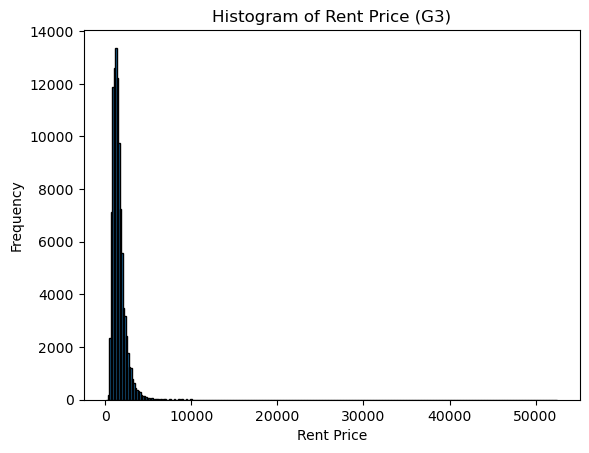

In [24]:
plt.hist(combo['price'], edgecolor='black', bins=300)
plt.title('Histogram of Rent Price (G3)')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

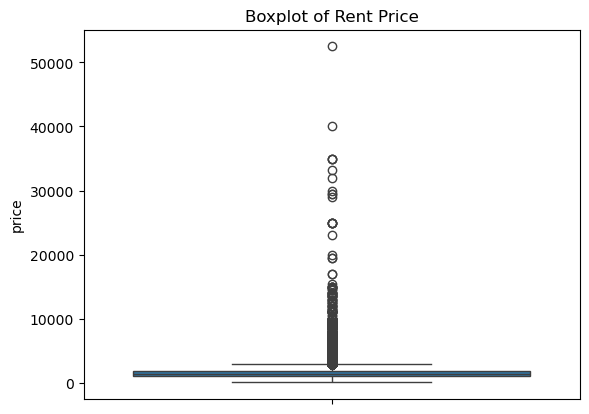

In [25]:
sns.boxplot(y='price', data=combo)
plt.title('Boxplot of Rent Price')
plt.show()

The rent price is seen to have left skewness, this means that the data is mostly in lower values. The boxplot shows outliers on the higher end of the whisker, this will be normalized to make the analysis more robust.

In [26]:
Q1 = combo['price'].quantile(0.25)
Q3 = combo['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
combo = combo[(combo['price'] >= lower_bound) & (combo['price'] <= upper_bound)]

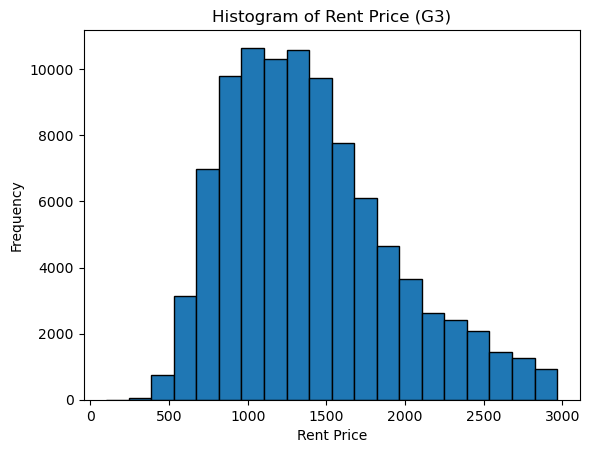

In [27]:
plt.hist(combo['price'], edgecolor='black', bins=20)
plt.title('Histogram of Rent Price (G3)')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

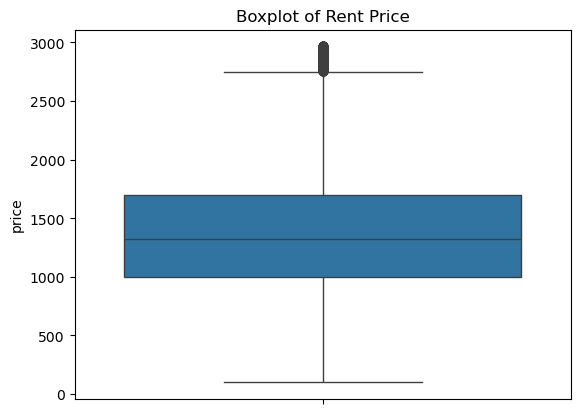

In [28]:
sns.boxplot(y='price', data=combo)
plt.title('Boxplot of Rent Price')
plt.show()

now the data is more normally distributed.

## Boxplot Against Price

In [29]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94962 entries, 0 to 99989
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  94962 non-null  int64  
 1   category            94962 non-null  object 
 2   title               94962 non-null  object 
 3   body                94962 non-null  object 
 4   bathrooms           94962 non-null  float64
 5   bedrooms            94962 non-null  float64
 6   currency            94962 non-null  object 
 7   fee                 94962 non-null  object 
 8   has_photo           94962 non-null  object 
 9   price               94962 non-null  float64
 10  price_display       94962 non-null  object 
 11  price_type          94962 non-null  object 
 12  square_feet         94962 non-null  int64  
 13  address             7406 non-null   object 
 14  cityname            94962 non-null  object 
 15  state               94962 non-null  object 
 16  latitude 

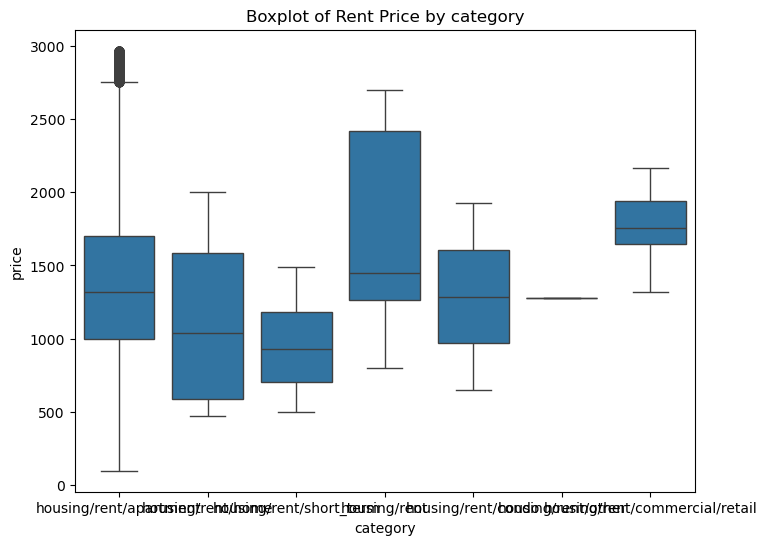

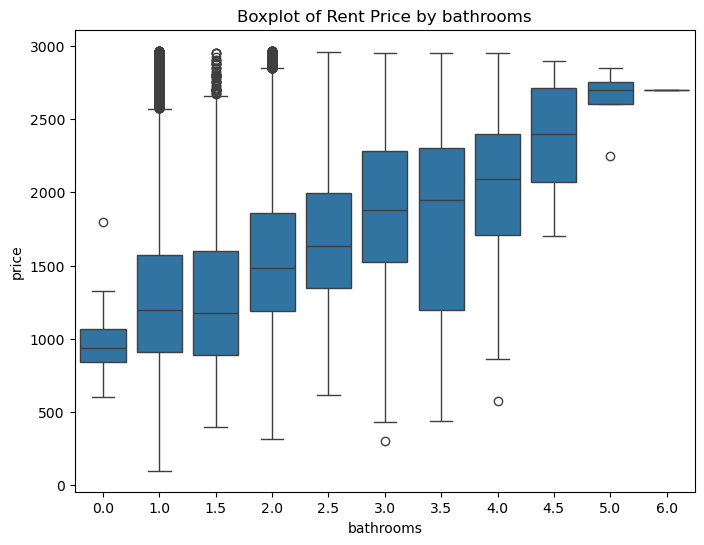

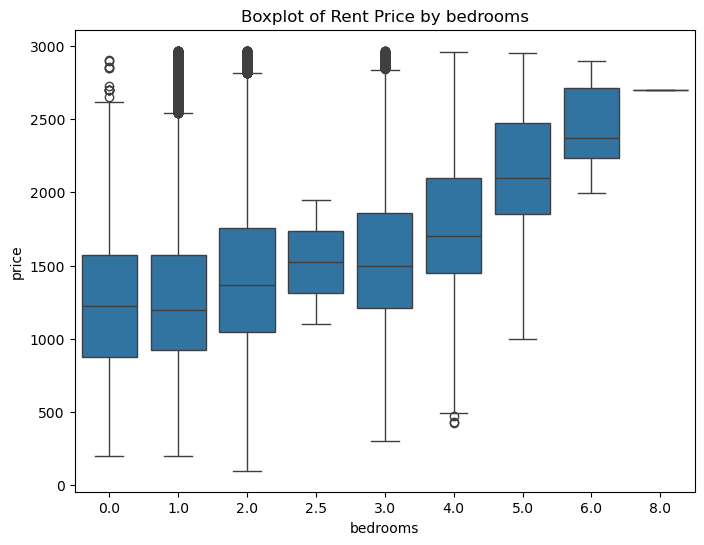

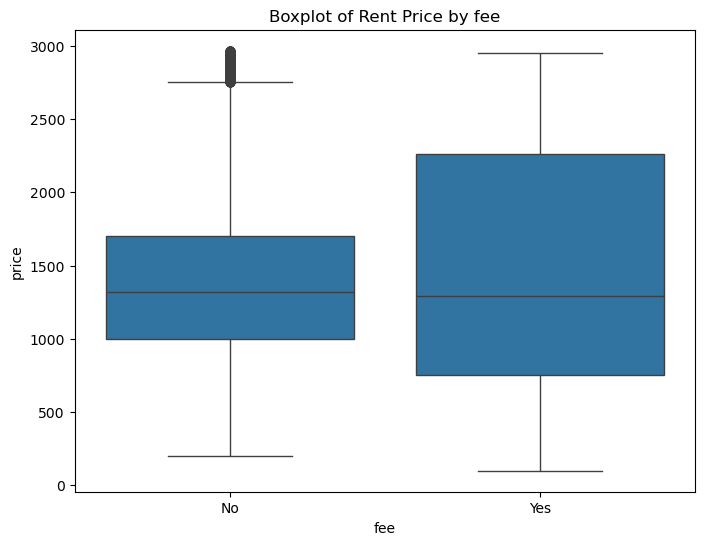

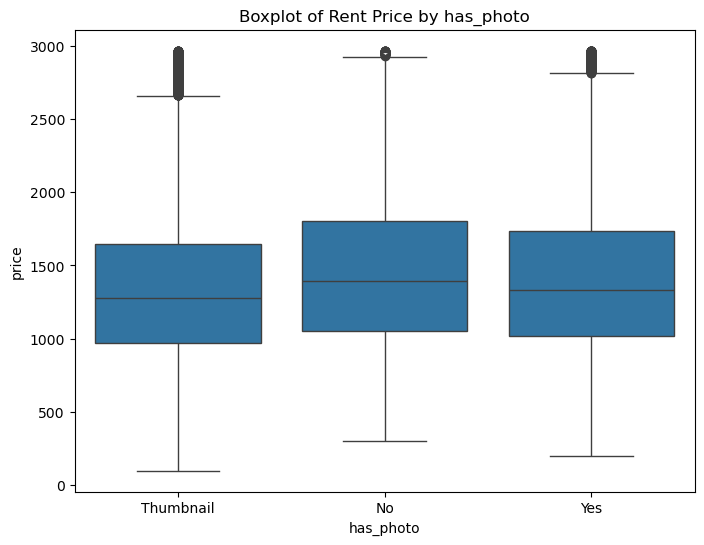

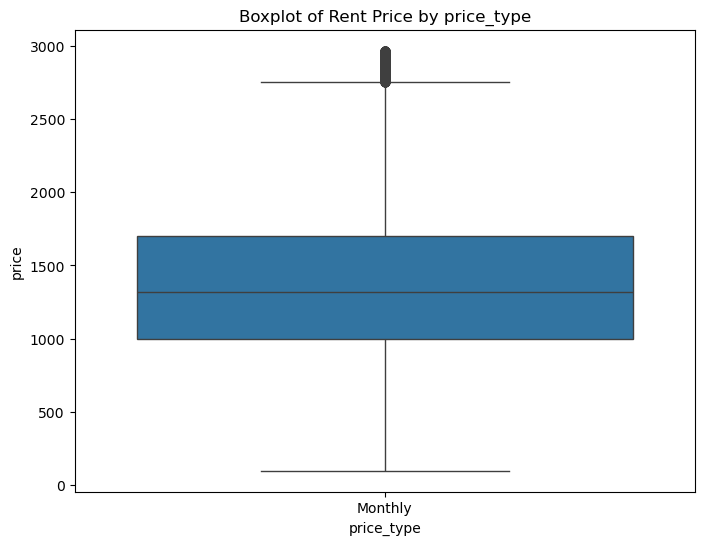

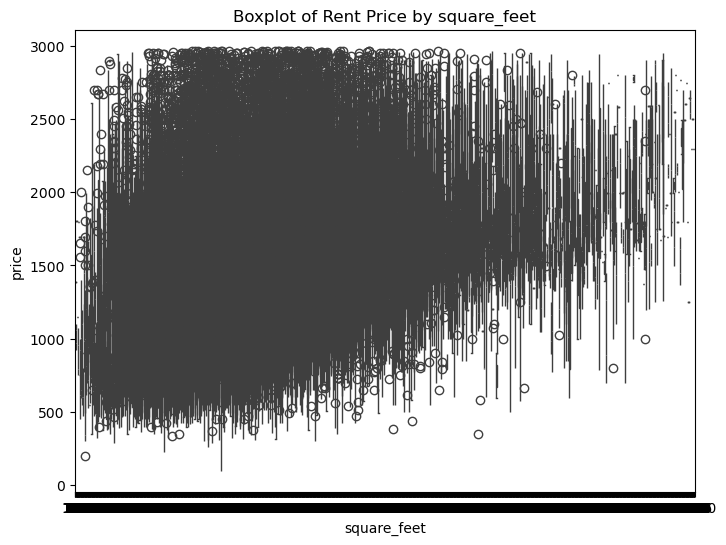

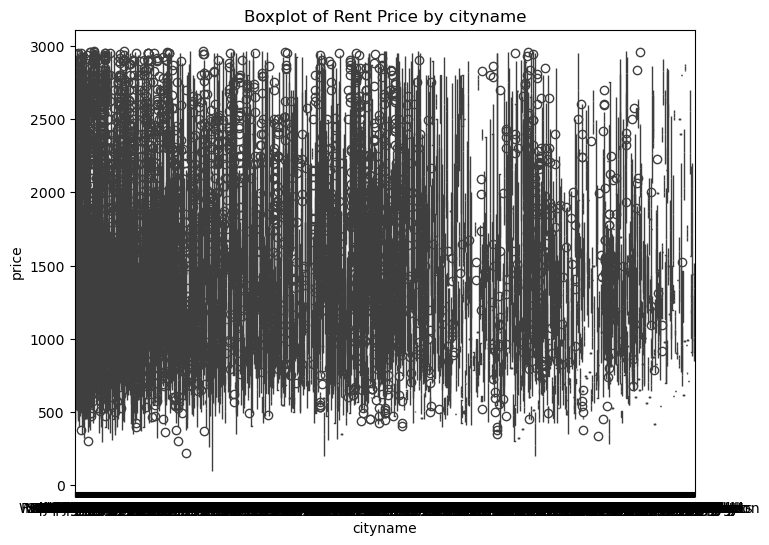

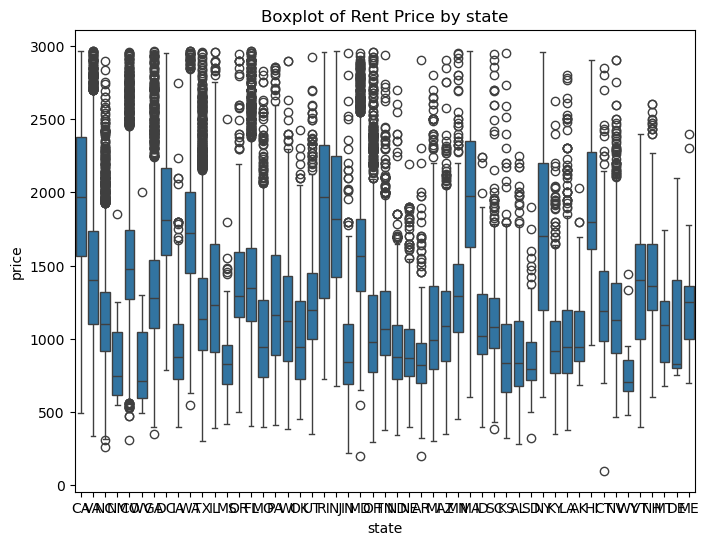

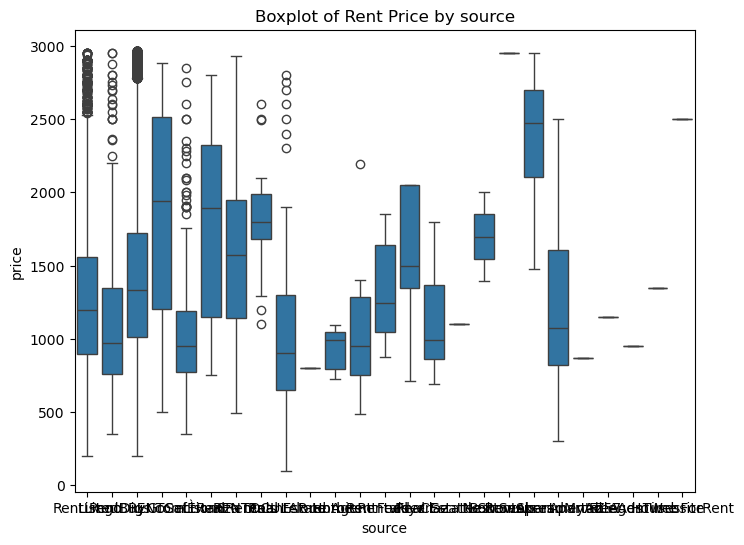

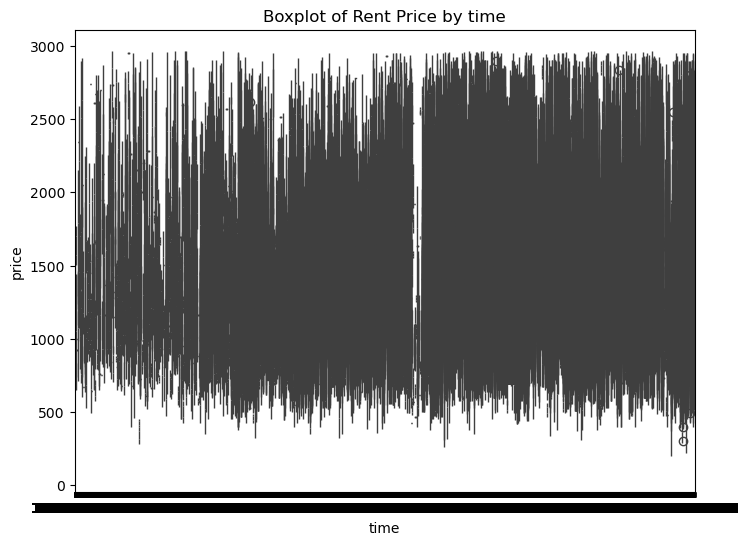

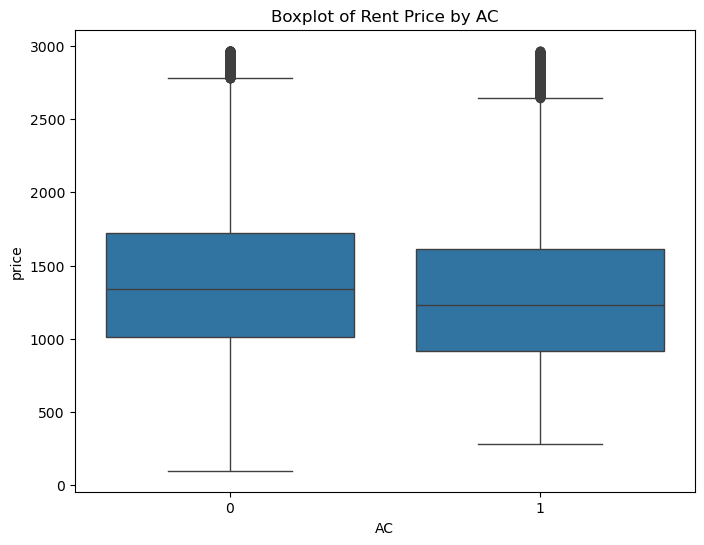

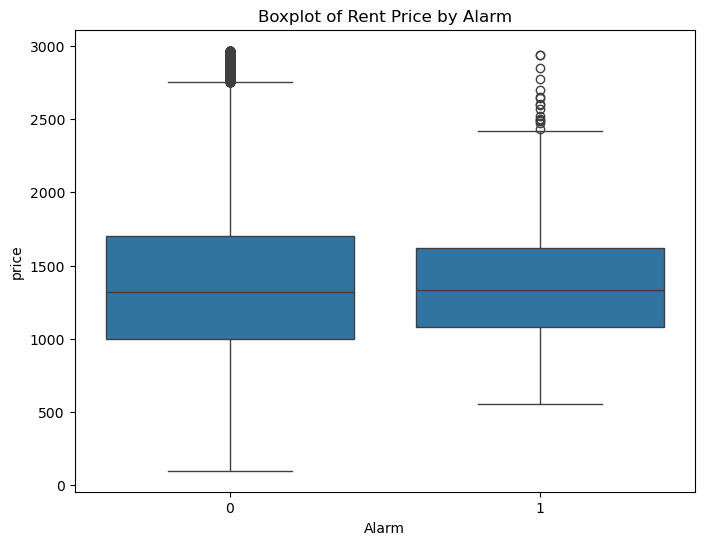

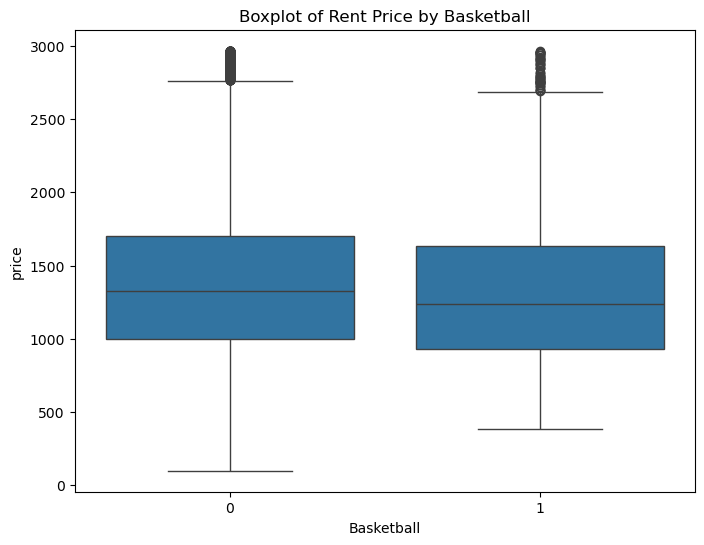

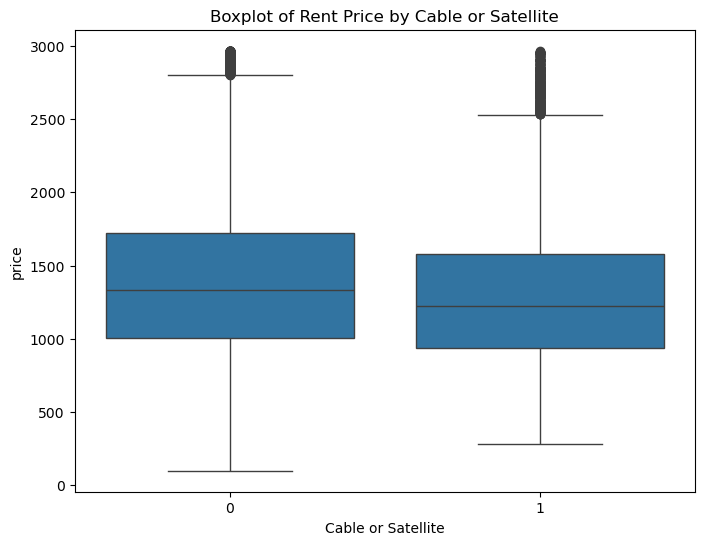

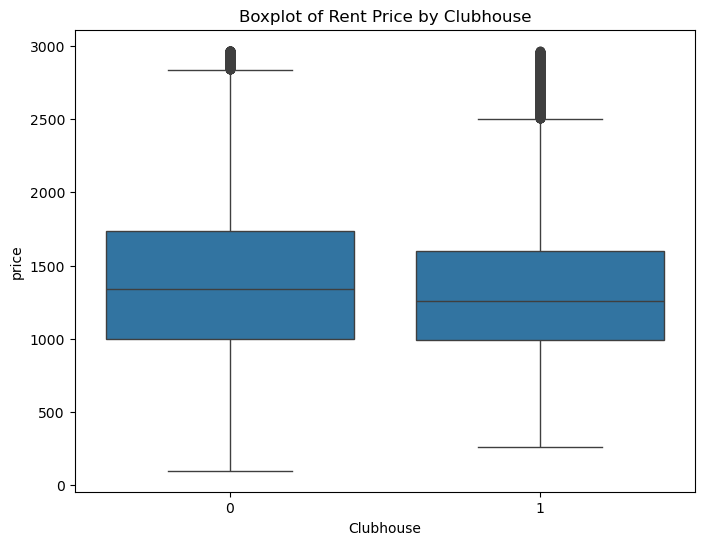

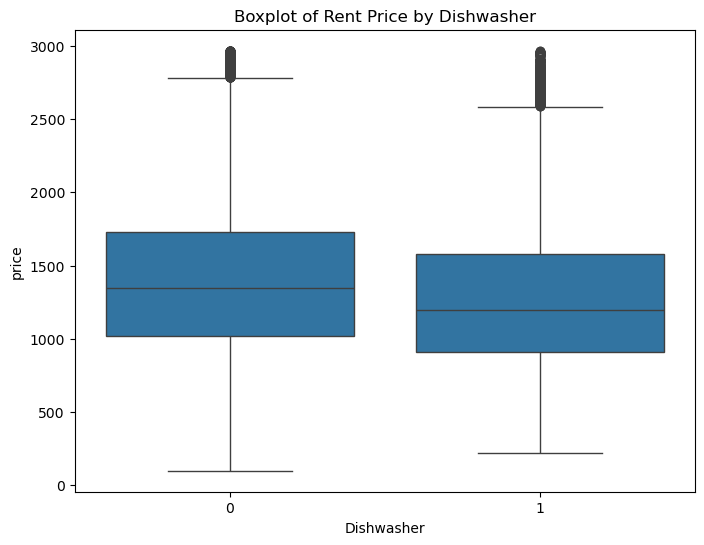

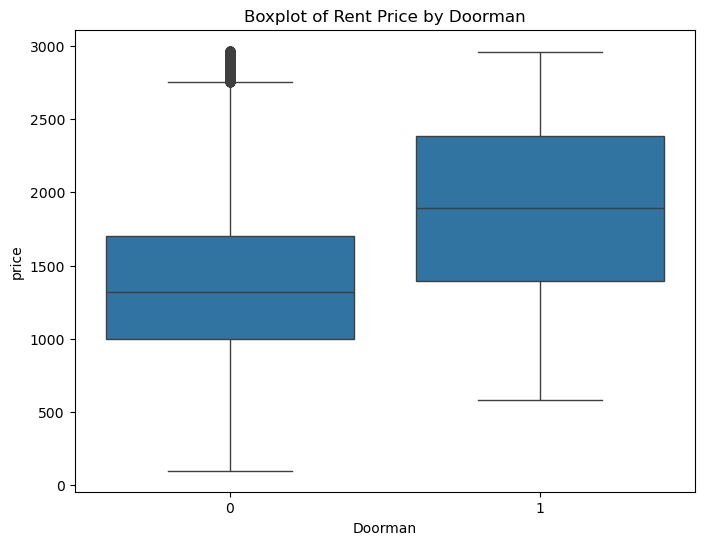

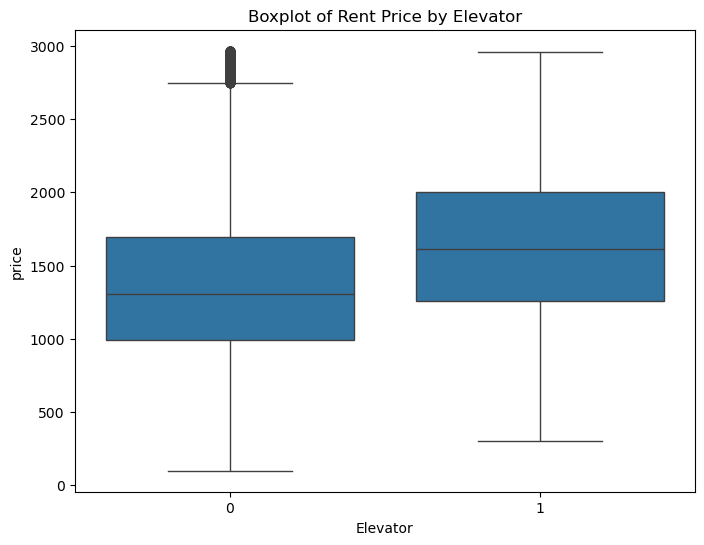

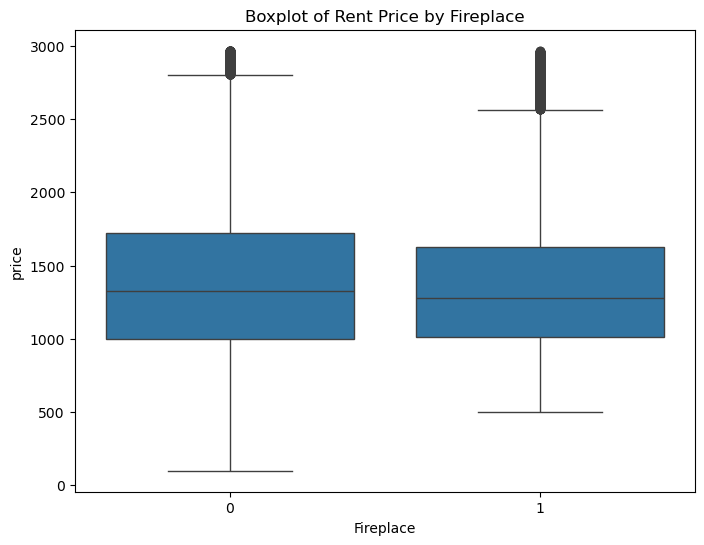

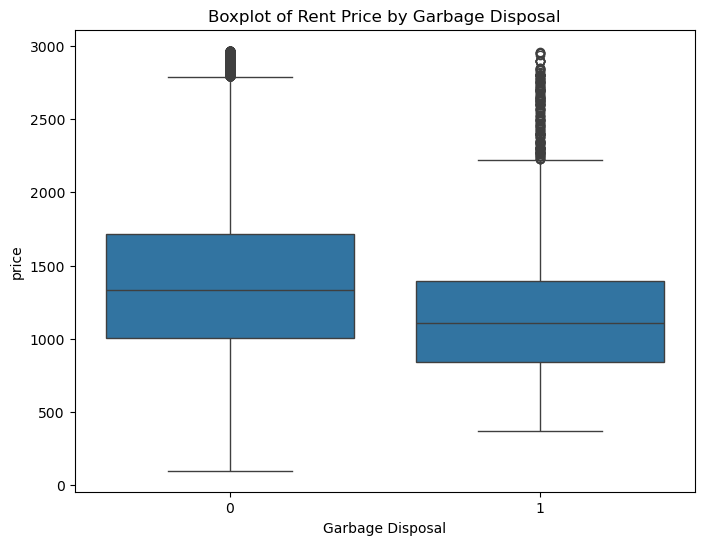

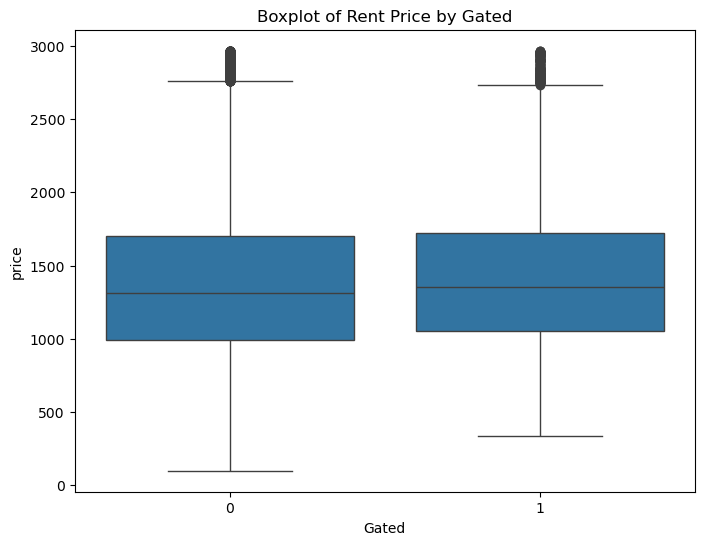

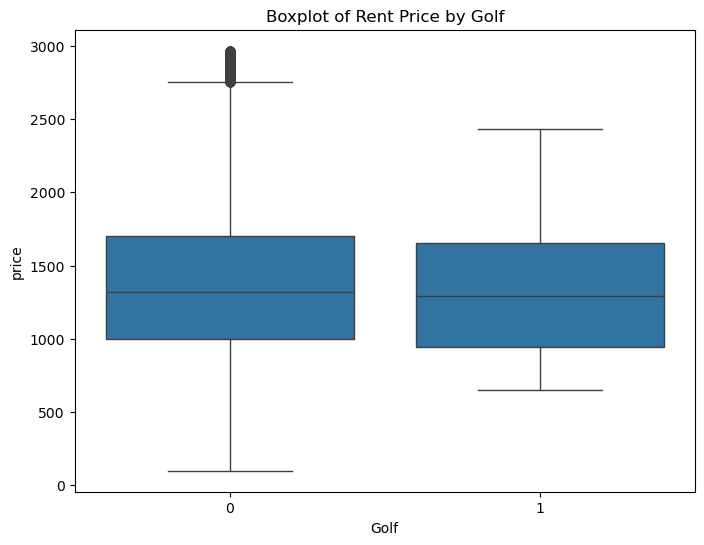

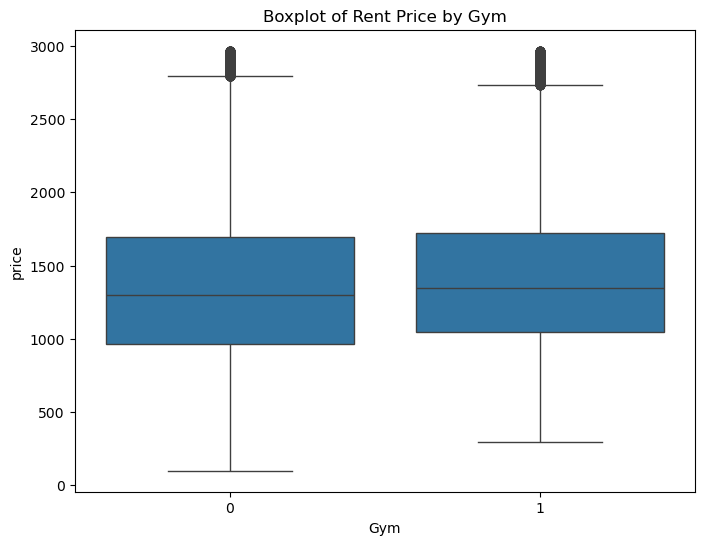

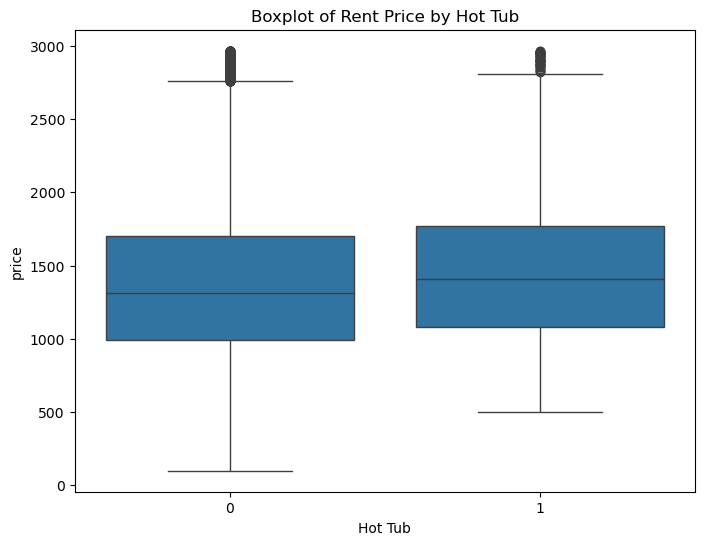

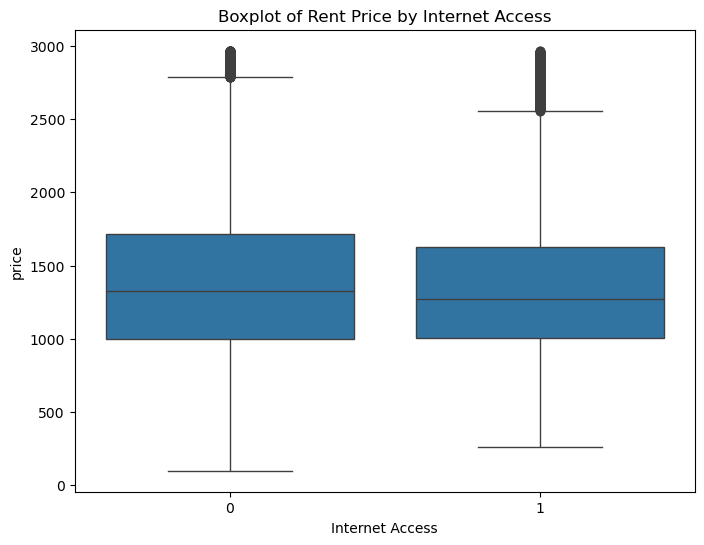

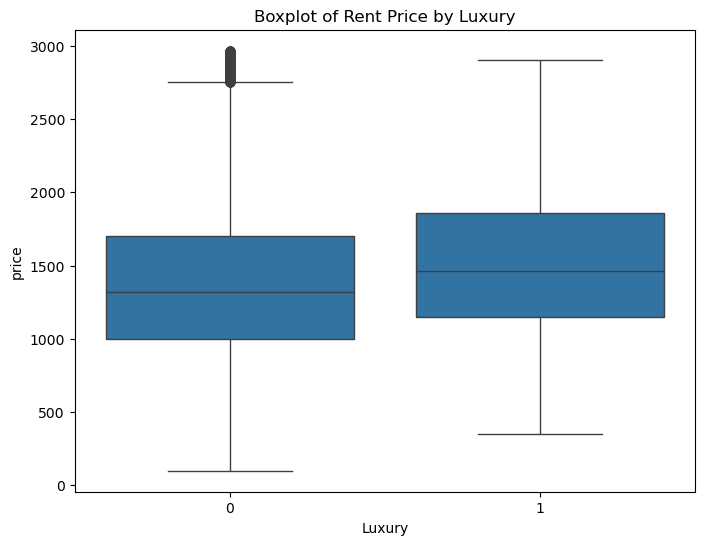

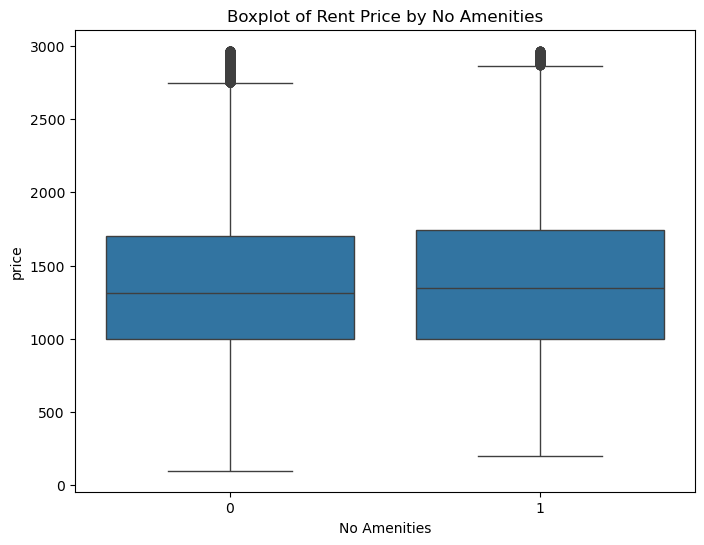

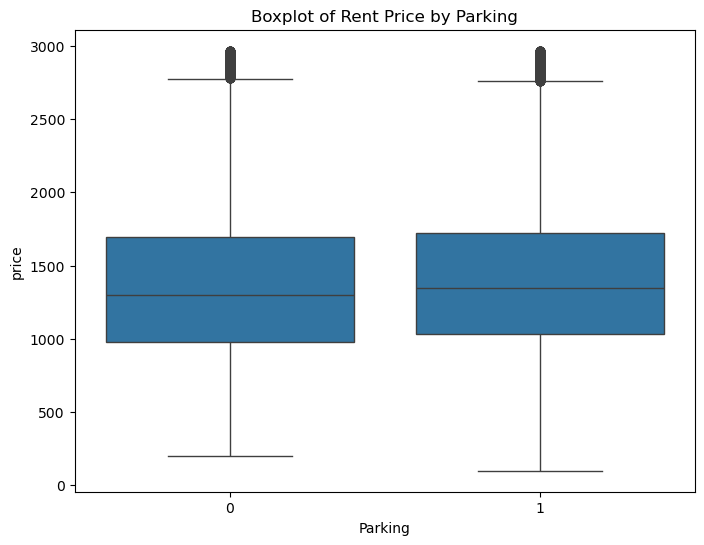

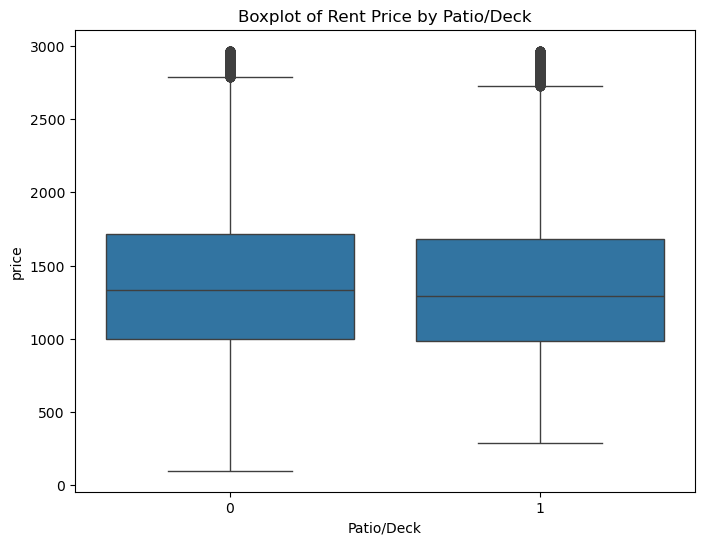

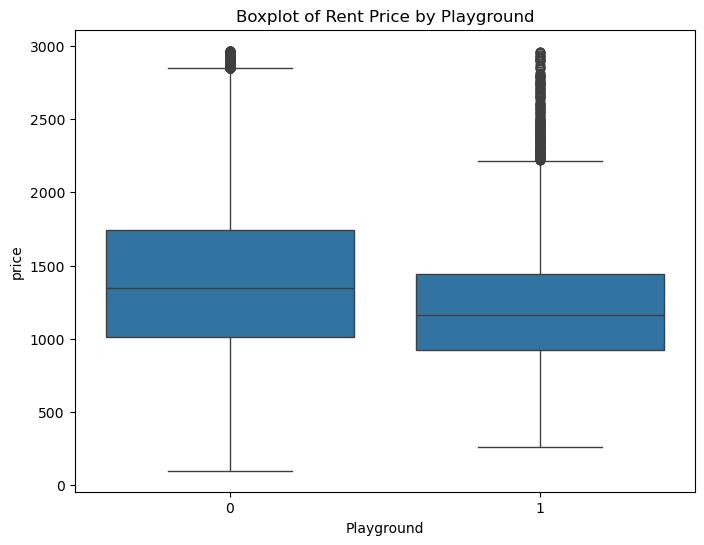

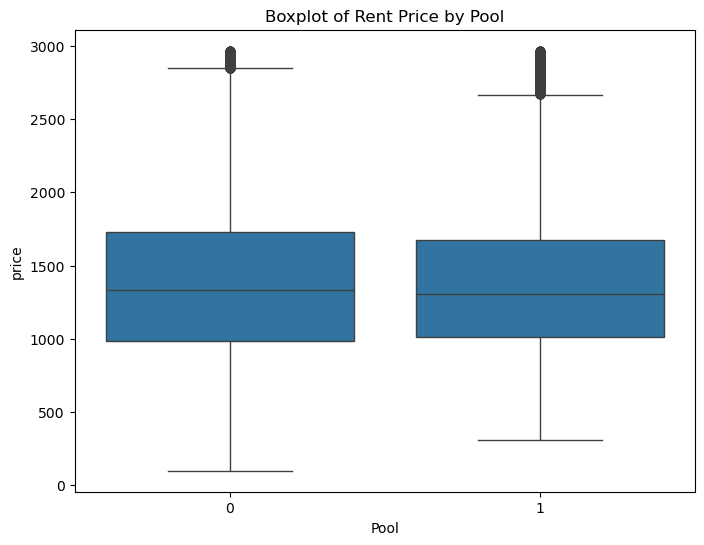

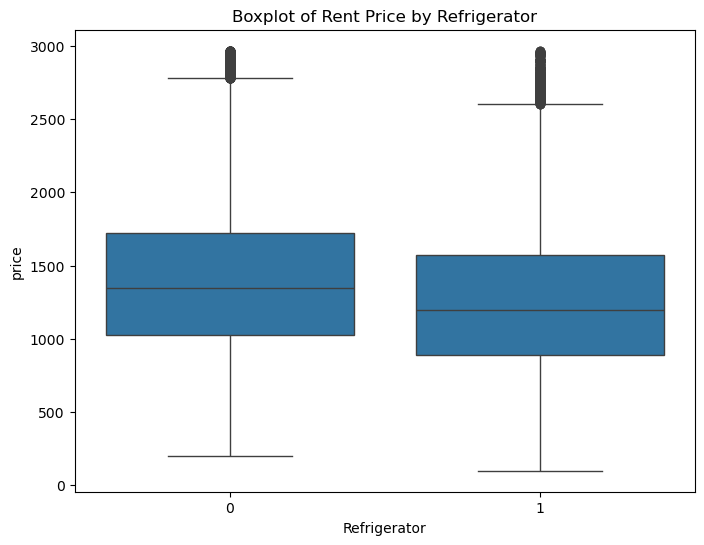

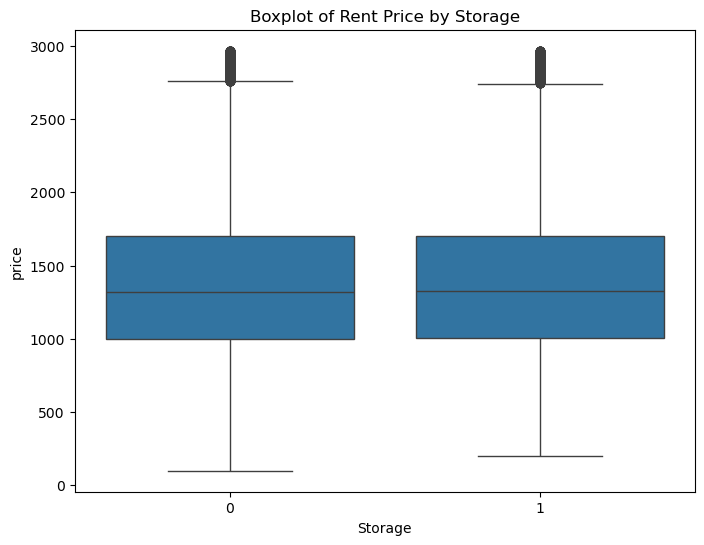

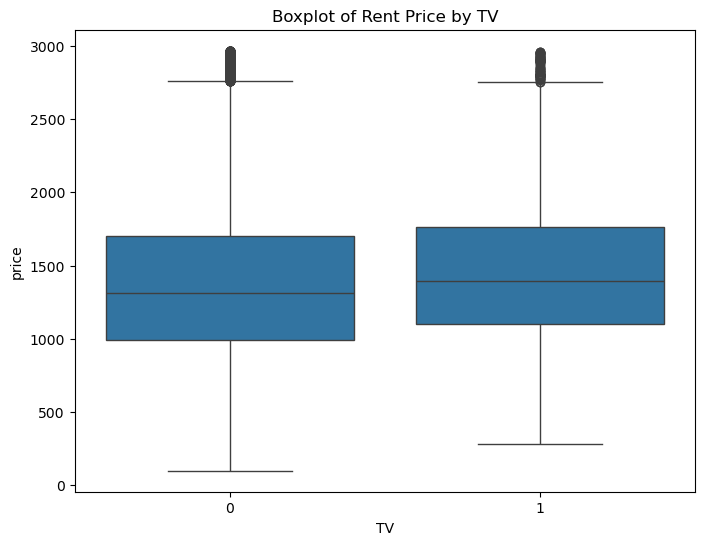

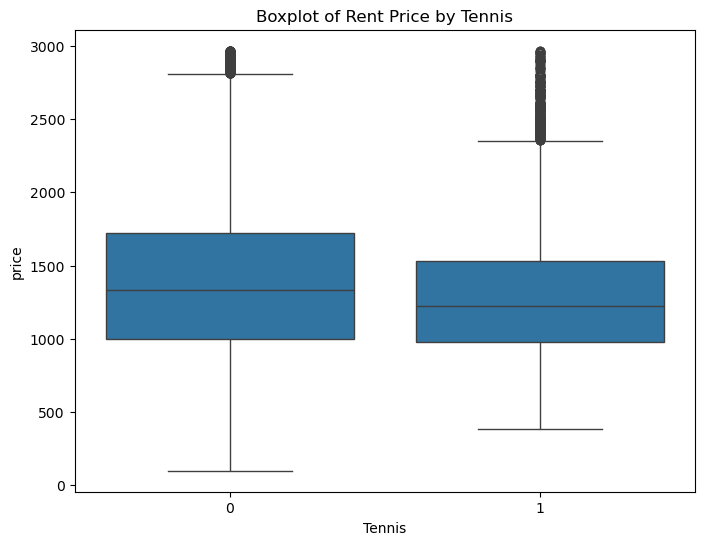

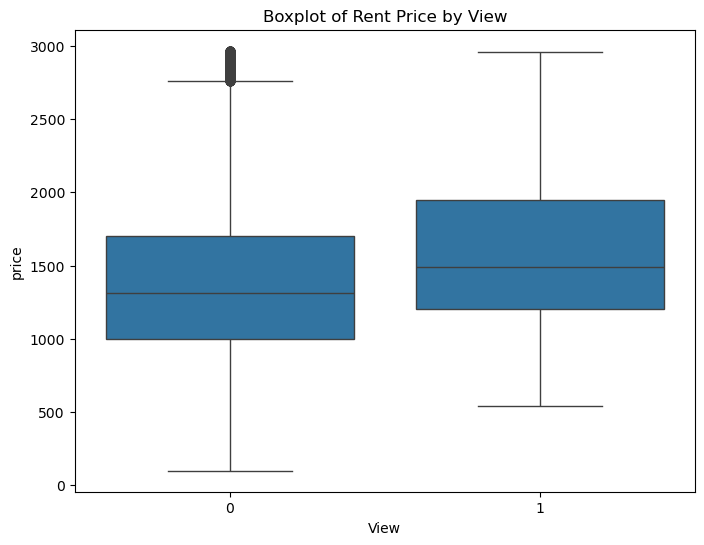

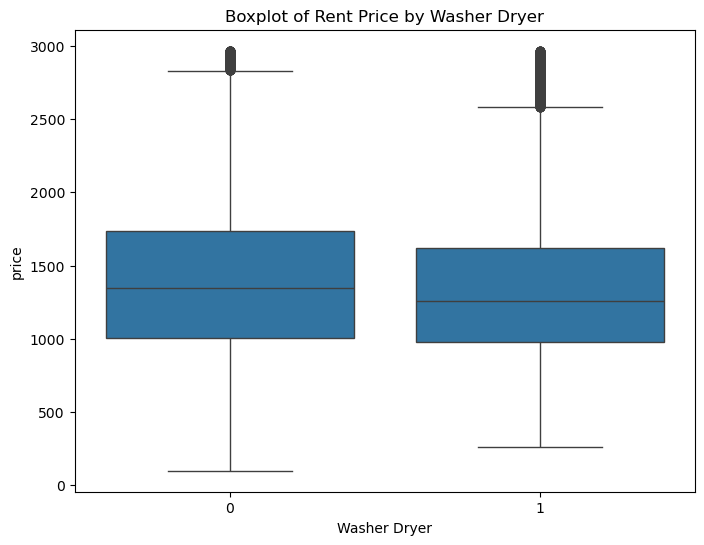

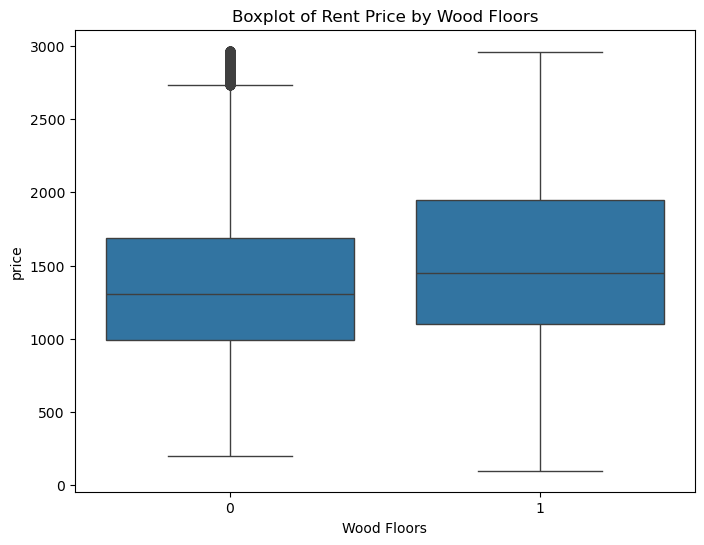

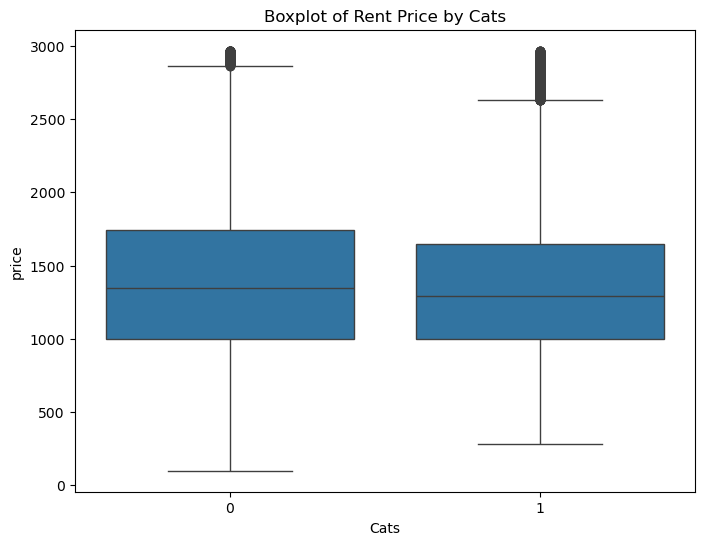

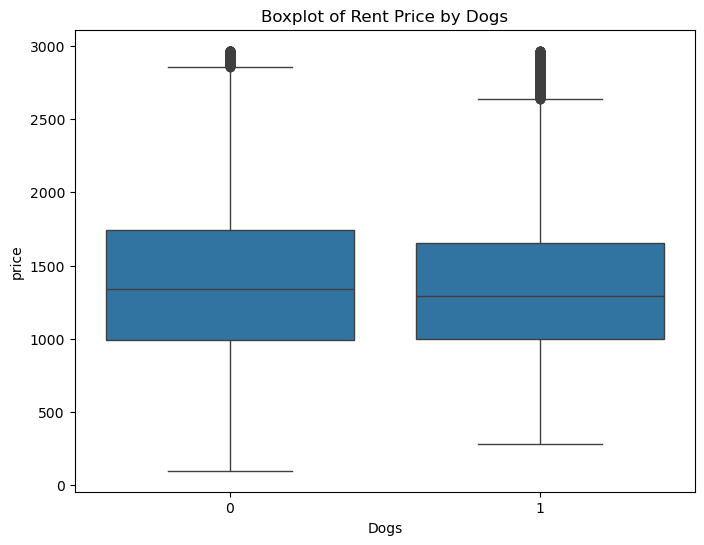

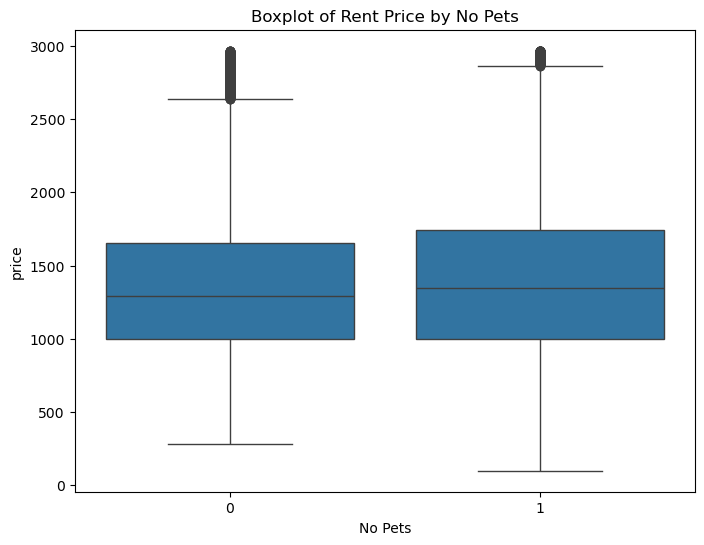

In [30]:
cols_to_plot = [col for col in combo.columns if col not in ['price', 'id', 'title','body','currency','price_display','address','latitude','longitude']]

for col in cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='price', data=combo)
    plt.title(f'Boxplot of Rent Price by {col}')
    plt.show()

1. Apartment-type property has the highest average price compared to the other property types. The writer thinks that this is normal because the data has more information about apartments compared to the other property type.
2. The higher the number of bathrooms, the higher the average rent price.
3. The higher the number of bedrooms, the higher the average rent price tends to be.
4. If the property has no additional fees, the average rent price is higher.
5. If the property listing has a thumbnail photo, the average rent price is higher.
6. The larger the property (in square feet), the higher the average rent price.
7. No visible pattern in how the city names the property where it is located affects the average rent price.
8. No visible pattern in how the state the property is located affects the average rent price.
9. No visible pattern in which website the property is listed affects the average rent price.
10. No visible pattern exists in when the property is listed that affects the average rent price.
11. The average rent price tends to be higher when there is no AC.
12. The average rent price tends to be higher when there is no alarm.
13. The average rent price tends to be higher when there is no basketball court.
14. The average rent price tends to be higher when there is no Cable or Satellite.
15. The average rent price tends to be higher when there is no Clubhouse.
16. The average rent price tends to be higher when there is no Dishwasher.
17. The average rent price tends to be higher when there is a Doorman.
18. The average rent price tends to be higher when there is an Elevator.
19. The rent price tends to be higher when there is no Fireplace.
20. The average rent price tends to be higher when there is no Garbage Disposal.
21. The average rent price tends to be higher when there is no gating.
22. The average rent price tends to be higher when there is a Golf Club.
23. The average rent price tends to be higher when there is no Gym.
24. The average rent price tends to be higher when there is a Hot Tub.
25. The average rent price tends to be higher when there is no Internet Access.
26. The average rent price tends to be higher when there is a Luxury hub.
27. The average rent price tends to be higher when there are no Amenities.
28. The average rent price tends to be higher when there is no Parking.
29. The average rent price tends to be higher when there is no Patio/Deck.
30. The average rent price tends to be higher when there is no Playground.
31. The average rent price tends to be higher when there is no Pool.
32. The average rent price tends to be higher when there is no Refrigerator.
33. The average rent price tends to be higher when there is no Storage.
34. The average rent price tends to be higher when there is no TV.
35. The average rent price tends to be higher when there is no Tennis field.
36. The average rent price tends to be higher when there is a certain View.
37. The average rent price tends to be higher when there is no Washer/Dryer.
38. The average rent price tends to be higher when the floor is Wood.
39. The average rent price tends to be higher when pets are allowed, specifically Cats.
40. The average rent price tends to be higher when pets are allowed, specifically Dogs.
41. The average rent price tends to be higher when there are no pets allowed.

## Correlation Plot

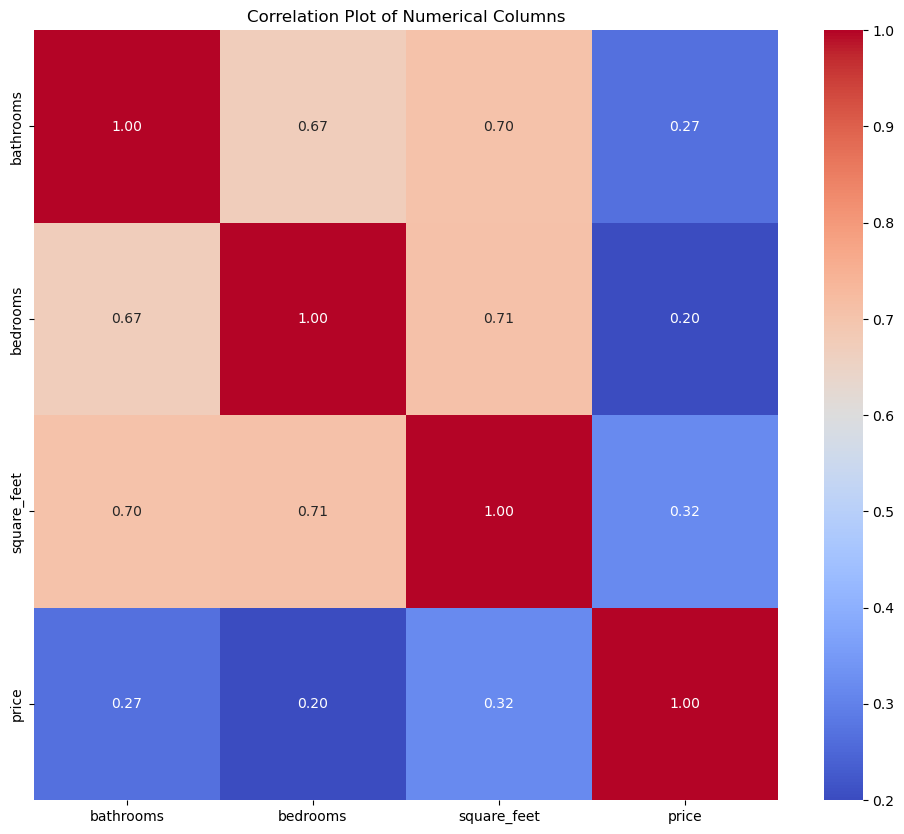

In [31]:
# Select numerical columns
num_cols = ['bathrooms','bedrooms', 'square_feet','price']

# Compute correlation matrix
corr = combo[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Plot of Numerical Columns')
plt.show()

There are moderate - high correlation between the number of bedrooms, bathrooms, against the square feet and low-moderate correlation between price and square feet, number of bathrooms, and number of bedrooms.

# Feature Engineering

## Split Train and Test

In [32]:
X = combo.drop(['price', 'id', 'title','body','currency','price_display','address','latitude','longitude','price_type','time'], axis=1)
y = combo['price']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 42)

## Feature Selection

In [34]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train[['bedrooms','bathrooms','square_feet']])

vif_high = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_high.columns = ['feature','vif_score']
vif_high = vif_high.loc[vif_high.feature!='const']
vif_high

,feature,vif_score
1,bedrooms,2.273544
2,bathrooms,2.252843
3,square_feet,2.524199


based on the VIF score, the suspected correlated features have moderate correlation, hence it is considered okay not to remove anything.

## Mean Encoding

In [35]:
from feature_engine.encoding import RareLabelEncoder, MeanEncoder
rare_encoder = RareLabelEncoder(
    tol=0.01,  # <1% frequency → 'Rare'
    variables=['category','has_photo','cityname','state','source']
)
rare_encoder.fit(X_train)
X_train_rare = rare_encoder.transform(X_train)
X_test_rare = rare_encoder.transform(X_test)

mean_encoder = MeanEncoder(variables=['category','has_photo','cityname','state','source'])
mean_encoder.fit(X_train_rare, y_train)

X_train= mean_encoder.transform(X_train_rare)
X_test = mean_encoder.transform(X_test_rare)

overall_mean = y_train.mean()
categorical_vars = ['category','has_photo','cityname','state','source']
for var in categorical_vars:
    if X_test[var].isnull().any():
        null_count = X_test[var].isnull().sum()
        X_test[var].fillna(overall_mean, inplace=True)
        print(f"Filled {null_count} unknown categories in {var} with overall mean")

/opt/anaconda3/lib/python3.12/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable category is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable has_photo is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


## Ordinal Encoding

In [36]:
from sklearn.preprocessing import OrdinalEncoder

ord_encode = ['fee']
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = ord_encoder.fit_transform(X_train[ord_encode])
X_train[ord_encode] = pd.DataFrame(X_train_encoded, columns=ord_encode, index=X_train.index)

In [37]:
X_test_encoded = ord_encoder.transform(X_test[ord_encode])
X_test[ord_encode] = pd.DataFrame(X_test_encoded, columns=ord_encode, index=X_test.index)

## MinMax Scaling

In [38]:
# min-max scaler based on training data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

minmax_scaler = scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# Modelling Machine Learning

## Linear Regression

### Fitting

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
import pandas as pd

# Assuming X_train is a DataFrame with feature columns
feature_names = X_train.columns
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df

,Feature,Coefficient
0,category,0.106678
1,bathrooms,140.421876
2,bedrooms,-47.376057
3,fee,-36.378616
4,has_photo,0.385773
5,square_feet,0.520783
6,cityname,0.445670
7,state,0.987738
8,source,-0.311138
9,AC,-69.404387


### Diagnostic

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


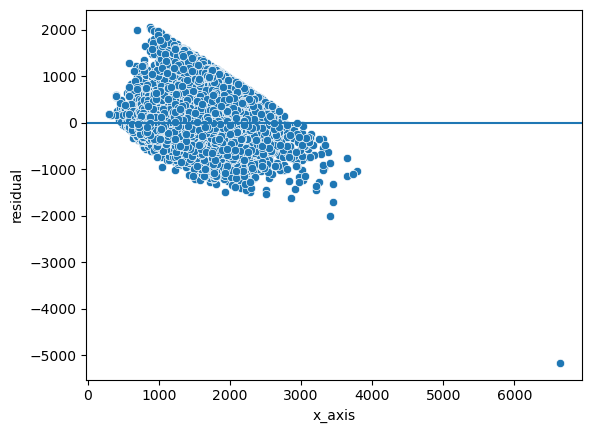

In [41]:
# calculate residuals
y_predict_train = model.predict(X_train)
residual = y_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


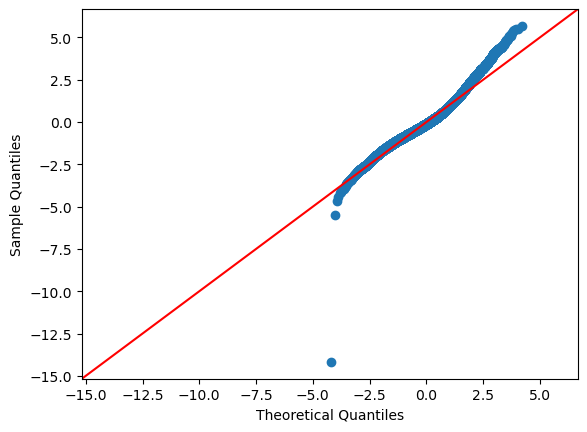

In [42]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.values.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

The residual plot shows that there is systemic downward pattern, this means that there is an opportunity to explore non-linear regression. The Q-Q plot shows a relatively normal distribution with slight deviations, but considered okay.

### Cross Validation

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


               R2         MAE        RMSE
0        0.530676  275.501788  365.225041
1        0.507103  279.636540  369.526874
2        0.523407  274.685062  362.652716
3        0.517617  276.423690  366.202863
4        0.530491  270.800558  358.315543
Average  0.521859  275.409528  364.384607


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### Evaluation

In [44]:
y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [45]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [46]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.5236739288337653
MAE: 273.20509470622574
RMSE: 363.7502404238264
MAPE: 21.36%


the linear regression model performs well because no bias or no overfitting because it is seen that the prediction result is better enough than the cross validation result.

However, it is known that the linear model will deviates at around 1.1 and 0.77 point based on RMSE and MAE, and this deviation is 6.65% from the actual value. This deviation is pretty high, we will try to improve the linear model with Ridge regularization because all features are considered important.

## Linear Regression with Ridge

Linear regression with Ridge is done to make sure no feature are penalized to 0 because every feature in the data is considered important.

### Fitting

In [47]:
# split train test
from sklearn.model_selection import train_test_split

# splitting: train and validation
X_potrain, X_validation, y_potrain, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [48]:
from sklearn.linear_model import Ridge

# train the model
X_potrain_np = X_potrain.to_numpy()
y_potrain_np = y_potrain.to_numpy()
y_potrain_np = y_potrain_np.reshape(len(y_potrain_np),)

# define the model
# 4 models with 4 different lambdas or alphas
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)
ridge_reg_hund = Ridge(alpha=100, random_state=42)
ridge_reg_tho = Ridge(alpha=1000, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_potrain_np, y_potrain_np)
ridge_reg_pointone.fit(X_potrain_np, y_potrain_np)
ridge_reg_one.fit(X_potrain_np, y_potrain_np)
ridge_reg_ten.fit(X_potrain_np, y_potrain_np)
ridge_reg_hund.fit(X_potrain_np, y_potrain_np)
ridge_reg_tho.fit(X_potrain_np, y_potrain_np)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.

Ridge(alpha=1000, random_state=42)

In [49]:
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.1, 1., 10,100,1000]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten,
          ridge_reg_hund,
          ridge_reg_tho]

X_validation_np = X_validation.to_numpy()

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation_np)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 360.085746999436
RMSE of Ridge regression model with alpha = 0.1 is 360.08586826632296
RMSE of Ridge regression model with alpha = 1.0 is 360.08710298954384
RMSE of Ridge regression model with alpha = 10 is 360.1014667541574
RMSE of Ridge regression model with alpha = 100 is 360.2749673436534
RMSE of Ridge regression model with alpha = 1000 is 361.0935322028849


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Based on the RMSE, Ridge regression with lamda 0.01 is the most optimum.

In [50]:
ridge_best = ridge_reg_hund

coef_df = pd.DataFrame({
    'feature':['intercept'] + X_potrain.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,-1648.893016
1,category,0.157895
2,bathrooms,136.335934
3,bedrooms,-48.406455
4,fee,-7.888023
5,has_photo,0.405429
6,square_feet,0.529593
7,cityname,0.449863
8,state,0.987554
9,source,-0.293622


### Diagnostic

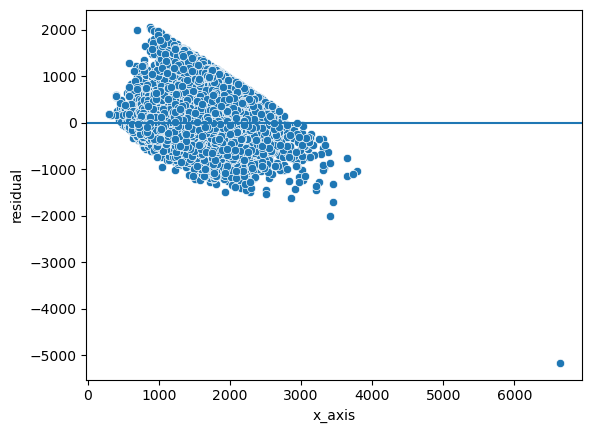

In [51]:
# calculate residuals
residual = y_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


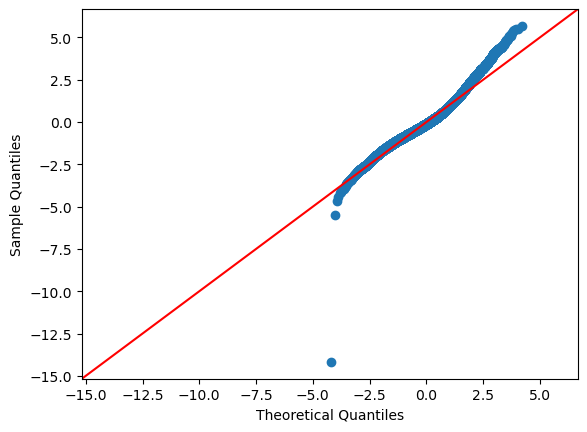

In [52]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.values.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

The residual plot shows that the linear model with Ridge fits well because there are no systemic or curvature shape, while the QQ Plot shows that that the error is normally distributed also shows linear fits well.

### Cross Validation

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(ridge_best, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWar

               R2         MAE        RMSE
0        0.530343  275.642225  365.354743
1        0.506877  279.758551  369.611565
2        0.522851  274.814266  362.864276
3        0.517590  276.421938  366.213046
4        0.530065  270.870021  358.478025
Average  0.521545  275.501400  364.504331


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWar

In [54]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_potrain_np)

print('R-squared for training data is {}'.format(r2_score(y_potrain, y_predict_train)))

R-squared for training data is 0.5214062443899637


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### Evaluation

In [55]:
X_test_np = X_test.to_numpy()
y_pred = model.predict(X_test_np)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [56]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [57]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.5200621432261119
MAE: 273.8734276112798
RMSE: 365.12672061379044
MAPE: 21.45%


The use of regularized linear regression with ridge at alpha = 100 shows a higher MAE, RMSE, and MAPE. This means that the linear regression with ridge model is less effective than traditional linear regression, this means that traditional linear regression performs better.

## Decision Tree

### Fitting

In [58]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

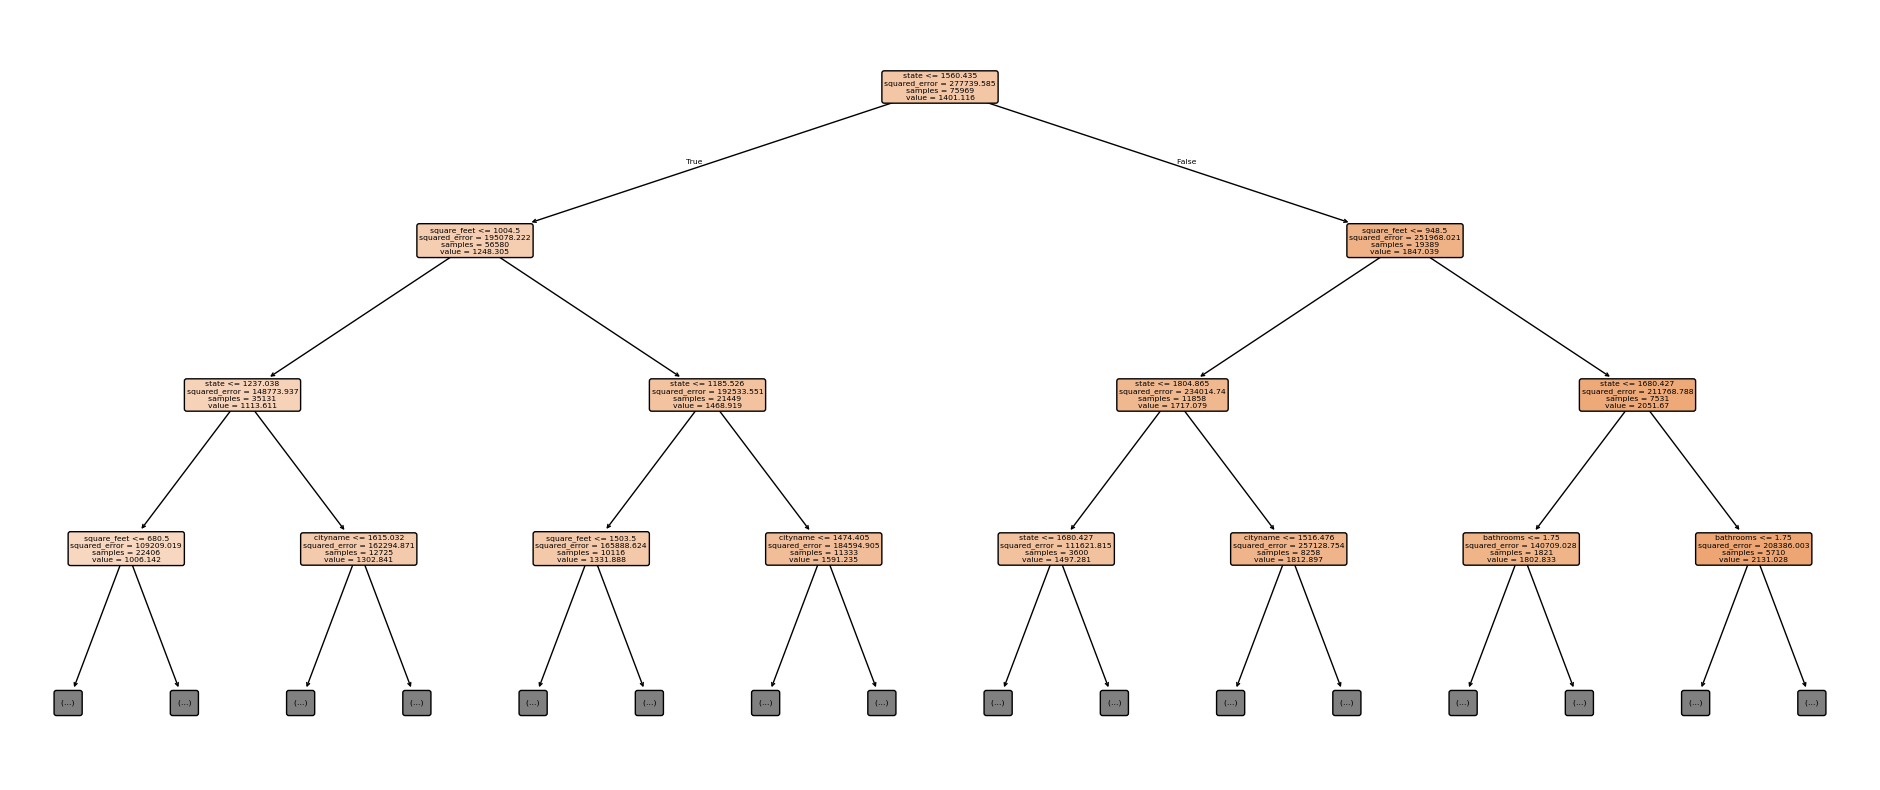

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24, 10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=3        # display only top levels so it fits on screen
)
plt.show()

In [60]:
imp = pd.Series(dt.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False).head(10)

state          0.368449
square_feet    0.291027
cityname       0.033572
bedrooms       0.022569
bathrooms      0.022303
has_photo      0.020840
Gym            0.015191
Pool           0.013913
Parking        0.013900
Storage        0.013046
dtype: float64

### Cross Validation

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.459174  240.861005  392.060245
1        0.431940  245.063532  396.702483
2        0.457263  238.528461  387.000816
3        0.421031  248.864788  401.193024
4        0.431123  245.794870  394.414594
Average  0.440106  243.822531  394.274232


### Evaluation

In [62]:
y_pred = dt.predict(X_test)

In [63]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [64]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.47842288760672214
MAE: 229.69151380201365
RMSE: 380.63645105228096
MAPE: 17.59%


## Random Forest

### Fitting

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [66]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

### Cross Validation

In [67]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.708287  191.165577  287.939984
1        0.686231  194.182973  294.830885
2        0.697843  191.657054  288.757581
3        0.690207  195.609133  293.468658
4        0.694325  192.231172  289.117115
Average  0.695378  192.969182  290.822845


### Evaluation

In [ ]:
# Evaluate on test set
y_pred = rf.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [69]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [70]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.7193398319553506
MAE: 182.74697477389384
RMSE: 279.2167727478787
MAPE: 14.15%


## Random Forest w/ Hyper Parameter Tuning

### Fitting

In [71]:
# Define parameter grid for optimization
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with RMSE scoring
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {-grid_search.best_score_:.3f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV RMSE: 289.708


### Cross Validation

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(best_rf, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.711186  190.069255  286.505865
1        0.688109  193.556906  293.947037
2        0.700803  190.709794  287.339501
3        0.691717  194.714484  292.752428
4        0.696692  191.211699  287.995691
Average  0.697701  192.052428  289.708104


### Evaluation

In [73]:
# Evaluate on test set
y_pred = best_rf.predict(X_test)

In [74]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [75]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.7217382628780242
MAE: 181.7425881616962
RMSE: 278.0211648810033
MAPE: 14.07%


## XGBoost with Hyperparameter Tuning

### Fitting

In [76]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)

In [77]:
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    xgboost, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [78]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=Non...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=1000,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000, 1500],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [79]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Use best model
best_xgboost = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.9}
Best CV Score: -83086.57018913513


### Cross Validation

In [80]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(best_xgboost, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.712324  198.946631  285.940671
1        0.692870  200.594550  291.694980
2        0.705247  198.967264  285.197907
3        0.692491  203.240962  292.384468
4        0.701019  198.725295  285.934082
Average  0.700790  200.094940  288.230422


### Evaluation

In [81]:
# Evaluate on test set
y_pred = best_xgboost.predict(X_test)

In [82]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [83]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.7207547912319381
MAE: 193.48843882424407
RMSE: 278.5120422226559
MAPE: 14.98%


## CatBoost with Hyperparameter Tuning

### Fitting

In [84]:
from catboost import CatBoostRegressor
cboost = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_state=42,
    verbose=200,
    early_stopping_rounds=100,
    use_best_model=True,
    bootstrap_type='Bayesian',
    bagging_temperature=1.0,
    od_type='Iter',
    od_wait=50
)

In [85]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'iterations': [500, 1000, 1500],
    'l2_leaf_reg': [1, 3, 5]
}

cboost = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    verbose=False
)

grid_search = GridSearchCV(
    cboost, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [86]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x1760cba70>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [500, 1000, 1500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error', verbose=1)

In [87]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_cboost = grid_search.best_estimator_

Best Parameters: {'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Score: -87863.98007469618


### Cross Validation

In [88]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np

# Define RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(rmse)
}

cv_results = cross_validate(best_cboost, X_train, y_train, cv=5, scoring=scoring)

results_df = pd.DataFrame({
    'R2': cv_results['test_r2'],
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse']
})

# Add a row for the average scores
avg_row = results_df.mean().to_frame().T
avg_row.index = ['Average']
results_df = pd.concat([results_df, avg_row])

print(results_df)

               R2         MAE        RMSE
0        0.693505  211.270074  295.145500
1        0.677181  212.365586  299.052460
2        0.687591  210.495204  293.615519
3        0.676735  214.389503  299.781548
4        0.682956  209.718141  294.444581
Average  0.683593  211.647702  296.407921


### Evaluation

In [89]:
# Evaluate on test set
y_pred = best_cboost.predict(X_test)

In [90]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

epsilon = 1e-10  # small value to avoid division by zero
non_zero_idx = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_idx] - y_pred[non_zero_idx]) / y_test[non_zero_idx])) * 100

In [91]:
print(f'R^2 Score: {r2}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape:.2f}%')

R^2 Score: 0.7018612607672099
MAE: 204.71677117947146
RMSE: 287.7798076346046
MAPE: 15.86%


## Deep Learning

### Fitting

In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [93]:
X_train_tensor = torch.FloatTensor(X_train.values if hasattr(X_train, 'values') else X_train)
y_train_tensor = torch.FloatTensor(y_train.values if hasattr(y_train, 'values') else y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test.values if hasattr(X_test, 'values') else X_test)
y_test_tensor = torch.FloatTensor(y_test.values if hasattr(y_test, 'values') else y_test).reshape(-1, 1)

In [94]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [95]:
class StudentPerformanceNN(nn.Module):
    def __init__(self, input_size):
        super(StudentPerformanceNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.network(x)

In [96]:
def rmse_loss(predictions, targets):
    return torch.sqrt(nn.MSELoss()(predictions, targets))

In [97]:
tflow = StudentPerformanceNN(X_train_tensor.shape[1])

### Evaluation

In [98]:
# Make predictions
tflow.eval()
with torch.no_grad():
    y_pred = tflow(X_test_tensor).numpy()

In [99]:
y_test_np = y_test_tensor.numpy()
mse = mean_squared_error(y_test_np, y_pred)
mae = mean_absolute_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)
rmse = np.sqrt(mse)

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate MAPE with handling for zero values
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Handle zero values to avoid division by zero
    non_zero_mask = y_true != 0
    
    if np.sum(non_zero_mask) == 0:
        return np.inf  # All true values are zero
    
    # Calculate MAPE only for non-zero true values
    mape = np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    
    return mape

mape = mean_absolute_percentage_error(y_test_np, y_pred)

In [100]:
# Display all metrics
print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Model Performance:
R² Score: -6.9889
Mean Absolute Error (MAE): 1393.5935
Root Mean Squared Error (RMSE): 1489.6835
Mean Absolute Percentage Error (MAPE): 98.93%


# Save the Random Forest with Hyperparameter Tuning Model

In [101]:
#import joblib

# Assuming your trained model is named rf_model
#joblib.dump(best_rf, 'rent_rf.joblib')

In [102]:
#joblib.dump(minmax_scaler, 'rent_minmax_scaler.joblib')

In [103]:
#joblib.dump(mean_encoder, 'rent_mean_encoder.joblib')
#joblib.dump(ord_encoder, 'rent_ordinal_encoder.joblib')

In [104]:
#joblib.dump(rare_encoder, 'rent_rare_encoder.joblib')

In [105]:
# Create SHAP explainer (optimized for tree models)
import shap
import numpy
explainer = shap.TreeExplainer(best_rf)
shap_explanation = explainer(X_test[0:100])
shap_values = explainer.shap_values(X_test[0:100])

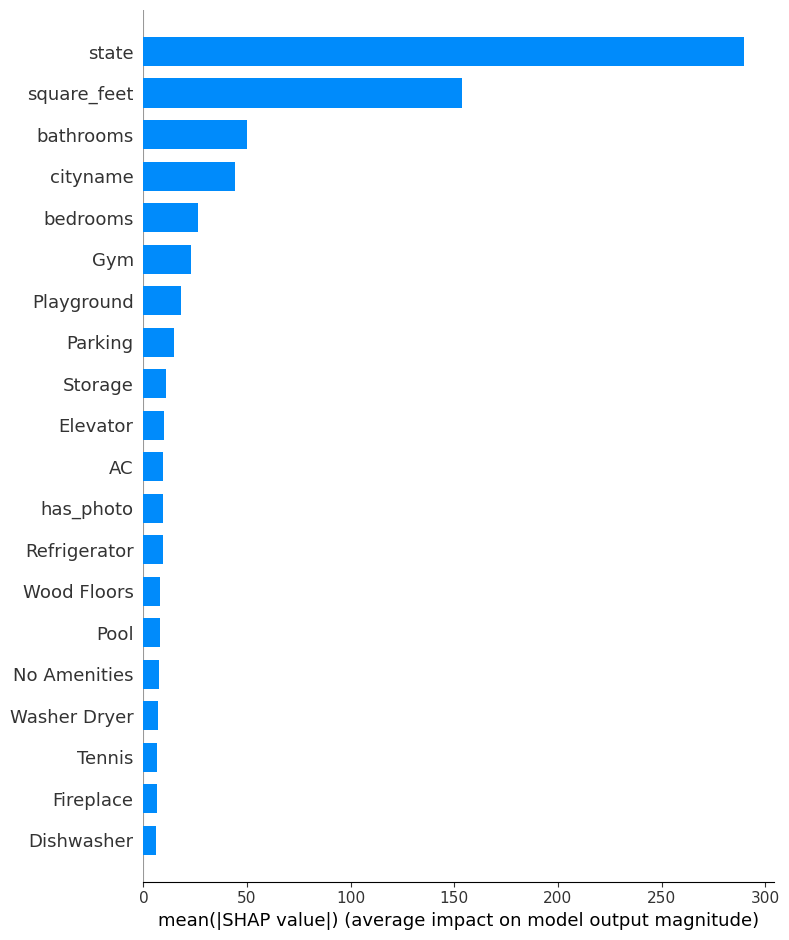

In [106]:
# Summary plot showing feature importance
shap.summary_plot(shap_values, X_test[0:100], plot_type="bar")

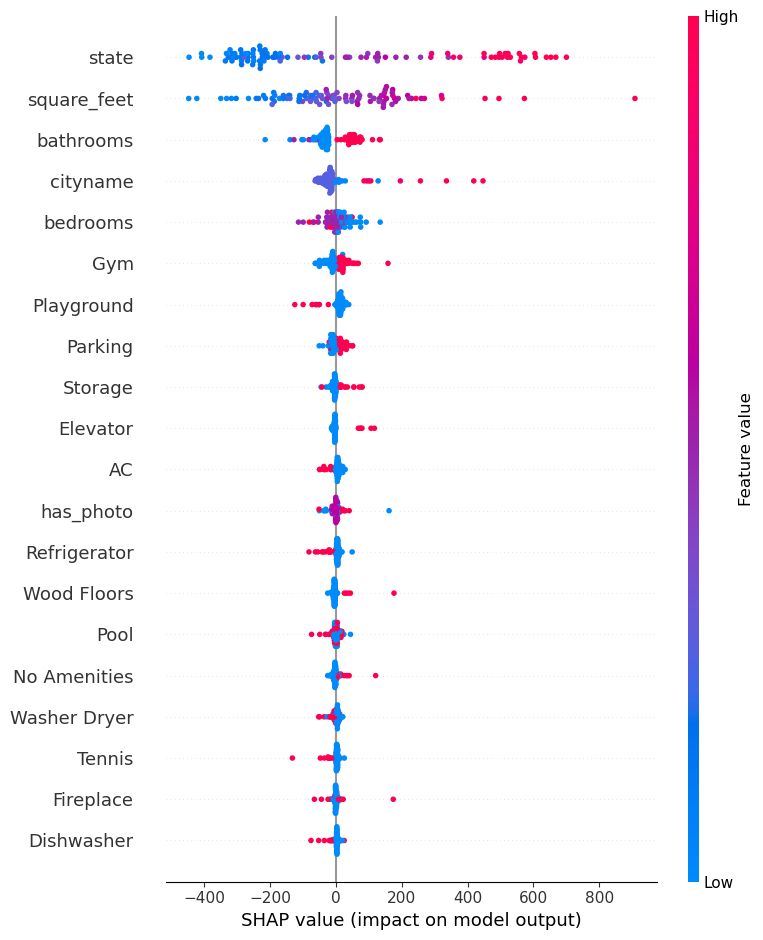

In [107]:
# Detailed summary plot with feature value distributions
shap.summary_plot(shap_values, X_test[0:100])